In [7]:
# setup
from fastai.tabular import *

#create df and drop null values
df = pd.read_csv('/notebooks/storage/brewing/recipeDataComplete.csv')
df = df.dropna(axis=0, subset=['Rating'])
df.count()

BeerID           2094
Name             2094
URL              2094
Style            2072
StyleID          2094
Size(L)          2094
OG               2094
FG               2094
ABV              2094
IBU              2094
Color            2094
BoilSize         2094
BoilTime         2094
BoilGravity      1874
Efficiency       2094
MashThickness    1116
SugarScale       2094
BrewMethod       2094
PitchRate        1030
PrimaryTemp      1426
PrimingMethod     254
PrimingAmount     170
UserId            839
Rating           2094
dtype: int64

In [8]:
#more setup
dep_var = 'Rating'
cat_names = ['Style', 'BrewMethod']
cont_names = ['BeerID','StyleID','Size(L)','OG','FG','ABV','IBU','Efficiency']

In [9]:
#setup databunch
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(len(df)-500, len(df)-200)

data = TabularDataBunch.from_df('/notebooks/storage/brewing/', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names,cont_names=cont_names)
print(data.train_ds.cont_names)

['BeerID', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Efficiency']


In [10]:
#define the model
learn = tabular_learner(data, layers=[200,100])
learn.loss_fn = F.mse_loss
learn.fit(6, 1e-1)

epoch,train_loss,valid_loss
1,3.136288,0.801038
2,1.645618,0.750783
3,1.149987,1.006323
4,0.934165,0.762434
5,0.832040,0.753915
6,0.764842,0.721542


In [13]:
learn.save('model4')

In [11]:
learn.get_preds()

[tensor([[4.3178],
         [4.3439],
         [4.3076],
         [4.5261],
         [4.3374],
         [4.3338],
         [4.4006],
         [4.2212],
         [4.3578],
         [4.2374],
         [4.4138],
         [4.3251],
         [4.3255],
         [4.3397],
         [4.3433],
         [4.5158],
         [4.4296],
         [4.3686],
         [4.2968],
         [4.3545],
         [4.3207],
         [4.3430],
         [4.4043],
         [4.3445],
         [4.3225],
         [4.2217],
         [4.3199],
         [4.5209],
         [4.4981],
         [4.4981],
         [4.3047],
         [4.2153],
         [4.3258],
         [4.2431],
         [4.3875],
         [4.3210],
         [4.5102],
         [4.3395],
         [4.3531],
         [4.5360],
         [4.3672],
         [4.3341],
         [4.2537],
         [4.2811],
         [4.3342],
         [4.1772],
         [4.1946],
         [4.3044],
         [4.1495],
         [4.3123],
         [4.3853],
         [4.4326],
         [4.

In [12]:
learn.predict(df.iloc[113])

(FloatItem [4.787381], tensor([4.7874]), tensor([4.7874]))

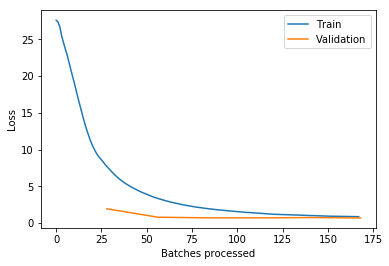

In [46]:
learn.recorder.plot_losses()

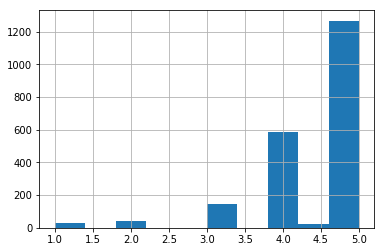

In [18]:
#Plot the distribution of ratings
df['Rating'].hist()

In [39]:
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Rating
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0,4.67
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0,4.62
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN,4.63
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN,4.67
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,4.00
